In [92]:

import os
from os.path import exists

from user_args import load_parser, check_args
from br_stat_profiler import preprocess_recal_table, profile_rt, save_profile

RECAL_TABLE_DIR = "./data/test_bqsr/"
REC_TAB_FULL_PATH = \
    RECAL_TABLE_DIR + "pre-LUAD-02_all_chrs_wo_Y_MT.bam.context4.recal_data.table"
OUTFILE_DIR = "./outfiles/"
OUTFILE = OUTFILE_DIR + "first_profile_num.csv"

if os.path.exists(OUTFILE):
    os.remove(OUTFILE)

cmd = f"--infile {REC_TAB_FULL_PATH} -o {OUTFILE} -co -20"
# cmd = f"--infile {REC_TAB_FULL_PATH} -o {OUTFILE}"

parser = load_parser()
args = parser.parse_args(cmd.split())
adict = check_args(args) 
# [print(key,":",val) for key,val in adict.items()] 


rt2_pre_stat_df = preprocess_recal_table(adict)
profile = profile_rt(rt2_pre_stat_df, adict)
save_profile(profile, adict)
profile.head()

harvested completed: Arguments
harvested completed: Quantized
harvested completed: RecalTable0
harvested completed: RecalTable1
harvested completed: RecalTable2


,HVWKMCCXY
BinAvgQltyErr:AAAA:0:Context,-1.268843
BinAvgQltyErr:AAAA:1:Context,-3.298974
BinAvgQltyErr:AAAA:2:Context,-1.376314
BinAvgQltyErr:AAAA:3:Context,1.174864
BinAvgQltyErr:AAAC:0:Context,-1.198880


In [93]:
rt2_pre_stat_df

,ReadGroup,QualityScore,CovariateValue,CovariateName,EventType,EmpiricalQuality,Observations,Errors,RG_ScoreBin
0,HVWKMCCXY,6,-1,Cycle,M,15.0,4707,10.0,0
1,HVWKMCCXY,6,-10,Cycle,M,8.0,4373,648.0,0
2,HVWKMCCXY,6,-100,Cycle,M,6.0,56,16.0,0
3,HVWKMCCXY,6,-101,Cycle,M,6.0,48,12.0,0
4,HVWKMCCXY,6,-102,Cycle,M,6.0,43,17.0,0
...,...,...,...,...,...,...,...,...,...
13710,HVWKMCCXY,32,TTAA,Context,M,41.0,171284812,12580.0,3
13711,HVWKMCCXY,32,TTAG,Context,M,37.0,97670908,18943.0,3
13712,HVWKMCCXY,32,TTCT,Context,M,39.0,203890620,26064.0,3
13713,HVWKMCCXY,32,TTTA,Context,M,38.0,206776269,32371.0,3


In [94]:
from constants import RC_TAB2
from br_stat_profiler import prepare_stat_df

stat_df = prepare_stat_df(rt2_pre_stat_df, RC_TAB2.CNTXT_COV, adict)
stat_df

,ReadGroup,RG_ScoreBin,Context,BinAvgQltyPval,BinAvgQltyScore,BinSumObs,BinSumObsErrs,BinAvgEmpQlty,BinAvgQltyErr,ID
0,HVWKMCCXY,0,AAAA,0.073150,11.357874,17708874,1912799.0,9.665216,-1.692658,AAAA:0:Context
1,HVWKMCCXY,1,AAAA,0.026477,15.771375,1889386,277449.0,8.331375,-7.440000,AAAA:1:Context
2,HVWKMCCXY,2,AAAA,0.004275,23.690297,49519043,335300.0,21.693387,-1.996910,AAAA:2:Context
3,HVWKMCCXY,3,AAAA,0.000786,31.043751,1068347230,252223.0,36.269277,5.225527,AAAA:3:Context
4,HVWKMCCXY,0,AAAC,0.174593,7.579741,7894543,1944518.0,6.085150,-1.494591,AAAC:0:Context
...,...,...,...,...,...,...,...,...,...,...
1019,HVWKMCCXY,3,TTTG,0.000983,30.074846,467477270,168485.0,34.431993,4.357147,TTTG:3:Context
1020,HVWKMCCXY,0,TTTT,0.114508,9.411623,18658718,3844379.0,6.860556,-2.551067,TTTT:0:Context
1021,HVWKMCCXY,1,TTTT,0.017223,17.638943,11382724,487202.0,13.685371,-3.953572,TTTT:1:Context
1022,HVWKMCCXY,2,TTTT,0.004358,23.607328,60077834,485729.0,20.923202,-2.684126,TTTT:2:Context


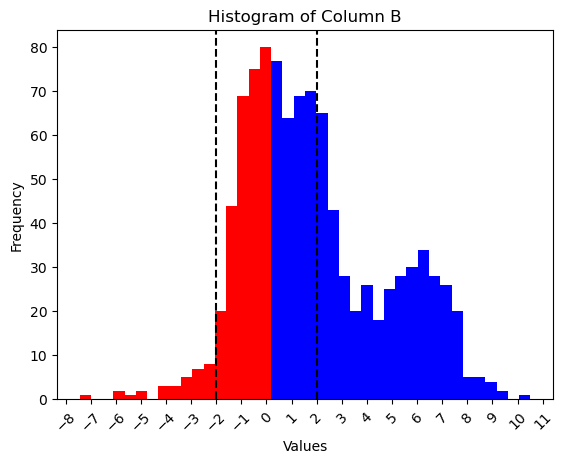

In [103]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from constants import RT2_STAT
# Assuming you have a dataframe called 'df' with columns 'A', 'B', and 'C'
cutoff = 2
bins_count = 40
data = stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL]

# Plotting the histogram
counts, bins, patches = plt.hist(data, bins=bins_count)  # Adjust the number of bins as needed

for i in range(len(bins)-1):
    if bins[i] <= 0:
        patches[i].set_facecolor('red')
    else:
        patches[i].set_facecolor('blue')

plt.axvline(x=cutoff, color='black', linestyle='--')
plt.axvline(x=-cutoff, color='black', linestyle='--')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column B')

minx = math.floor(stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL].min())
maxx =  math.ceil(stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL].max())
xticks = np.arange(minx, maxx+1, 1)

plt.xticks(xticks, rotation=45)
# Display the histogram
plt.show()


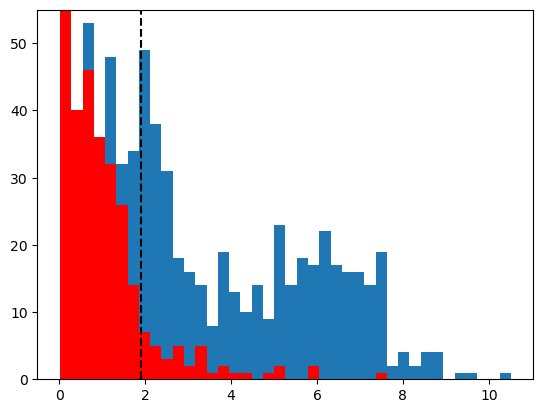

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from constants import RT2_STAT
# Assuming you have a dataframe called 'df' with columns 'A', 'B', and 'C'
cutoff = 1.9
bins_count = 80
data = stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL]
# Generate example data
# data = np.random.normal(0, 1, 1000)

# Create the histogram for the positive bins
counts_pos, bins_pos, _ = plt.hist(data[data >= 0], bins=round(bins_count/2))

# Extract the negative bins and calculate the positive mirror image
negative_bins = data[data < 0]
mirror_bins = -negative_bins

# Create the histogram for the mirror image of the negative bins
counts_mirror, bins_mirror, _ = plt.hist(mirror_bins, bins=bins_pos, color='red')

plt.axvline(x=cutoff, color='black', linestyle='--')

# Find the maximum count between positive and mirrored negative bins
max_count = max(np.max(counts_pos), np.max(counts_mirror))

# Set the y-axis limit to accommodate both positive and mirrored negative bins
plt.ylim(0, max_count)

# Display the plot
plt.show()


In [105]:
from br_stat_profiler import prepare_stat_df
from constants import RC_TAB2
cntxt_rt2_stat_df = prepare_stat_df(rt2_pre_stat_df, RC_TAB2.CNTXT_COV, adict)
cntxt_rt2_stat_df

,ReadGroup,RG_ScoreBin,Context,BinAvgQltyPval,BinAvgQltyScore,BinSumObs,BinSumObsErrs,BinAvgEmpQlty,BinAvgQltyErr,ID
0,HVWKMCCXY,0,AAAA,0.073150,11.357874,17708874,1912799.0,9.665216,-1.692658,AAAA:0:Context
1,HVWKMCCXY,1,AAAA,0.026477,15.771375,1889386,277449.0,8.331375,-7.440000,AAAA:1:Context
2,HVWKMCCXY,2,AAAA,0.004275,23.690297,49519043,335300.0,21.693387,-1.996910,AAAA:2:Context
3,HVWKMCCXY,3,AAAA,0.000786,31.043751,1068347230,252223.0,36.269277,5.225527,AAAA:3:Context
4,HVWKMCCXY,0,AAAC,0.174593,7.579741,7894543,1944518.0,6.085150,-1.494591,AAAC:0:Context
...,...,...,...,...,...,...,...,...,...,...
1019,HVWKMCCXY,3,TTTG,0.000983,30.074846,467477270,168485.0,34.431993,4.357147,TTTG:3:Context
1020,HVWKMCCXY,0,TTTT,0.114508,9.411623,18658718,3844379.0,6.860556,-2.551067,TTTT:0:Context
1021,HVWKMCCXY,1,TTTT,0.017223,17.638943,11382724,487202.0,13.685371,-3.953572,TTTT:1:Context
1022,HVWKMCCXY,2,TTTT,0.004358,23.607328,60077834,485729.0,20.923202,-2.684126,TTTT:2:Context


In [106]:
na_count = cntxt_rt2_stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL].isna().sum()
total = cntxt_rt2_stat_df.shape[0]
na_ratio = na_count/total
print(f"na couunt= {na_count}, total= {total}, na_ratio= {na_ratio}")


na couunt= 16, total= 1024, na_ratio= 0.015625


**QError Weighted Avg vs Context**

/tmp/ipykernel_1323340/2926086736.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', adict[UARGS.SCORE_BINS_COUNT])


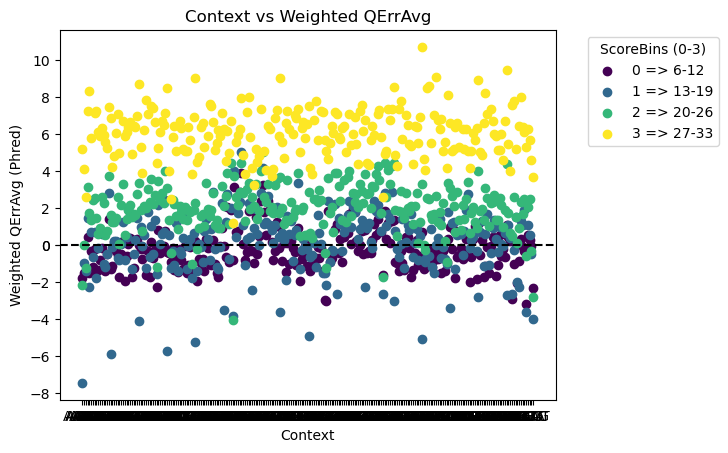

In [107]:
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from constants import RC_TAB2,RT2_STAT, CNTXT_RT2, RANGES
from user_args import UARGS
# draw a dot chart using matplotlib

def score_qntl_ranges(rt2_pre_stat_df):
    df =  rt2_pre_stat_df.groupby(RC_TAB2.RG_SCORE_BIN_COL)[RC_TAB2.QLTY_SCORE_COL].apply(lambda x: (min(x), max(x))).reset_index()
    return df.rename(columns={RC_TAB2.QLTY_SCORE_COL: RANGES.SCORE_BIN})

def jitter_list(lst, mean=0, std=0.1):
    jittered_list = np.array(lst) + np.random.normal(mean, std, len(lst))
    return jittered_list.tolist()

y_start = math.floor(cntxt_rt2_stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL].min())
y_end = math.ceil(cntxt_rt2_stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL].max())
jitter_factor = (y_end - y_start) /100

ranges = score_qntl_ranges(rt2_pre_stat_df)[RANGES.SCORE_BIN].unique()
# cmap = cm.get_cmap('viridis', len(cntxt_rt2_stat_df[RC_TAB2.RG_SCORE_BIN_COL].unique()))
cmap = cm.get_cmap('viridis', adict[UARGS.SCORE_BINS_COUNT])
# create the scatter plot
fig, ax = plt.subplots()
for i, group in cntxt_rt2_stat_df.groupby(RC_TAB2.RG_SCORE_BIN_COL):
    jittered_y = jitter_list(group[RT2_STAT.BIN_AVG_QLTY_ERR_COL], 0 , jitter_factor)
    # ax.scatter(group[CNTXT_RT2.CNTXT_COL], group[RT2_STAT.QLTY_ERR_W_AVG_COL], 
    ax.scatter(group[CNTXT_RT2.CNTXT_COL], jittered_y, 
            #    c=[cmap(i)], label=i)
        c=[cmap(i)], label=f'{i} => {ranges[i][0]}-{ranges[i][1]}')

ax.axhline(y=0, color='black', linestyle='--')
ax.set_title('Context vs Weighted QErrAvg')
ax.set_xlabel('Context')
ax.set_ylabel('Weighted QErrAvg (Phred)')
ax.legend(title="ScoreBins (0-3)", bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.xticks(range(cyc_rt2_stat_df[CYC_RT2.CYC_BIN_COL].min(), cyc_rt2_stat_df[CYC_RT2.CYC_BIN_COL].max()+1,2))

import numpy as np
# Y_TICKS_COUNT = 5
# yticks = np.arange(y_start, y_end, (y_end - y_start) / (Y_TICKS_COUNT))
YTICK_STEP = 2
yticks = np.arange(y_start, y_end, YTICK_STEP)
yticks = np.append(yticks, 0)

plt.yticks(yticks)
# display the chart
plt.show()


In [108]:
from br_stat_profiler import prepare_stat_df
from constants import RC_TAB2
mode = RC_TAB2.CYC_COV
cyc_rt2_stat_df = prepare_stat_df(rt2_pre_stat_df, mode, adict)
cyc_rt2_stat_df

,ReadGroup,RG_ScoreBin,CycleBin,BinAvgQltyPval,BinAvgQltyScore,BinSumObs,BinSumObsErrs,BinAvgEmpQlty,BinAvgQltyErr,ID
0,HVWKMCCXY,0,-10,0.099515,10.021131,169626912,19904921.0,9.305343,-0.715788,-10:0:CycleBin
1,HVWKMCCXY,1,-10,0.029454,15.308485,154104395,4691923.0,15.164641,-0.143843,-10:1:CycleBin
2,HVWKMCCXY,2,-10,0.004135,23.835704,861841998,1764885.0,26.887112,3.051408,-10:2:CycleBin
3,HVWKMCCXY,3,-10,0.000954,30.204877,2474719817,742464.0,35.228506,5.023629,-10:3:CycleBin
4,HVWKMCCXY,0,-1,0.110588,9.562929,38795578,4760348.0,9.111435,-0.451494,-1:0:CycleBin
...,...,...,...,...,...,...,...,...,...,...
75,HVWKMCCXY,3,8,0.000842,30.746445,3488416078,798856.0,36.401598,5.655153,8:3:CycleBin
76,HVWKMCCXY,0,9,0.108521,9.644858,76817863,9324672.0,9.158287,-0.486571,9:0:CycleBin
77,HVWKMCCXY,1,9,0.028549,15.444153,61166837,1707749.0,15.540920,0.096767,9:1:CycleBin
78,HVWKMCCXY,2,9,0.004706,23.273157,245683961,897354.0,24.374130,1.100973,9:2:CycleBin


**QError Weighted Avg vs Read Cycle**

0 (0.267004, 0.004874, 0.329415, 1.0)
1 (0.190631, 0.407061, 0.556089, 1.0)
2 (0.20803, 0.718701, 0.472873, 1.0)
3 (0.993248, 0.906157, 0.143936, 1.0)


/tmp/ipykernel_1323340/845560053.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', adict[UARGS.SCORE_BINS_COUNT])


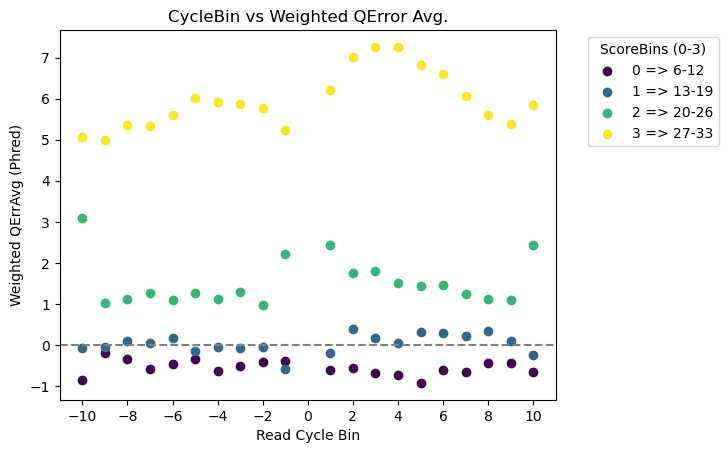

In [109]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from constants import RC_TAB2,RT2_STAT, CYC_RT2, RANGES
import matplotlib.colors as mcolors
from user_args import UARGS


def score_qntl_ranges(rt2_pre_stat_df):
    df =  rt2_pre_stat_df.groupby(RC_TAB2.RG_SCORE_BIN_COL)[RC_TAB2.QLTY_SCORE_COL].apply(lambda x: (min(x), max(x))).reset_index()
    return df.rename(columns={RC_TAB2.QLTY_SCORE_COL: RANGES.SCORE_BIN})

def jitter_list(lst, mean=0, std=0.1):
    jittered_list = np.array(lst) + np.random.normal(mean, std, len(lst))
    return jittered_list.tolist()

y_start = math.floor(cyc_rt2_stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL].min())
y_end   = math.ceil(cyc_rt2_stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL].max())
jitter_factor = (y_end - y_start) /100

ranges = score_qntl_ranges(rt2_pre_stat_df)[RANGES.SCORE_BIN].unique()
# cmap = cm.get_cmap('viridis', len(cyc_rt2_stat_df[RC_TAB2.RG_SCORE_BIN_COL].unique())+2)
cmap = cm.get_cmap('viridis', adict[UARGS.SCORE_BINS_COUNT])

fig, ax = plt.subplots()
for i, group in cyc_rt2_stat_df.groupby(RC_TAB2.RG_SCORE_BIN_COL):
    print(i, cmap(i))
    jittered_y = jitter_list(group[RT2_STAT.BIN_AVG_QLTY_ERR_COL], 0 , jitter_factor)
    ax.scatter(group[CYC_RT2.CYC_BIN_COL], jittered_y,
        c=[cmap(i)], label=f'{i} => {ranges[i][0]}-{ranges[i][1]}')

ax.axhline(y=0, color='grey', linestyle='--')
ax.set_title('CycleBin vs Weighted QError Avg.')
ax.set_xlabel('Read Cycle Bin')
ax.set_ylabel('Weighted QErrAvg (Phred)')
ax.legend(title="ScoreBins (0-3)", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(range(cyc_rt2_stat_df[CYC_RT2.CYC_BIN_COL].min(), cyc_rt2_stat_df[CYC_RT2.CYC_BIN_COL].max()+1,2))
# plt.yticks(range(round(cyc_rt2_stat_df[RT2_STAT.QLTY_ERR_AVG_COL].min()), round(cyc_rt2_stat_df[RT2_STAT.QLTY_ERR_AVG_COL].max())+1))
# display the chart
plt.show()
